## K Means Clustering From Scratch

In [1]:
%matplotlib inline

In [2]:
# implementing K Means Clustering from scratch for K = 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import math

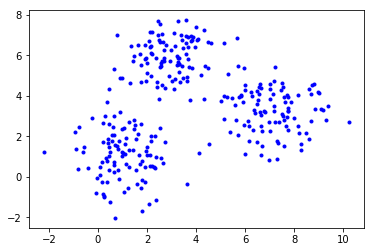

In [3]:
#===========================GENERATING DATASET===========================
#generate random data-centered around 3 points

#creatign centres
center1 = np.array([[1,1]])
center2 = np.array([[7,3]])
center3 = np.array([[3,6]])

# center = np.concatenate((center1, center2, center3), axis = 0)
# plt.plot(center[:, 0], center[:,1], 'r.')
# plt.show()

np.random.seed(142)

#creating dataset
set1 = np.random.randn(100,2) + center1
set2 = np.random.randn(100,2) + center2
set3 = np.random.randn(100,2) + center3

#plotting
x = np.concatenate((set1, set2, set3))
plt.plot(x[:,0], x[:, 1], 'b.')

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654]])

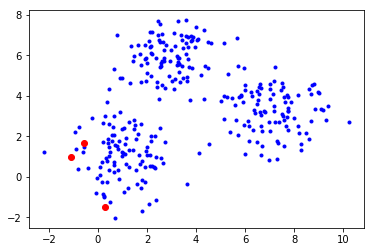

In [4]:
#solving for k = 3
k = 3

#storing number of training examples in m
m = x.shape[0]

#storing number of attributes in n
n = x.shape[1]

#intialising centeroids
np.random.seed(123)
c =np.random.randn(k, n)

plt.plot(x[:,0], x[:, 1], 'b.')
plt.plot(c[:,0], c[:, 1], 'ro')

c

In [5]:
# """
# Procedure:
# 0. define clusters_old (with zeroes, initially) and clusters_new (with centres, c defined above) 
# 1. form a cluster matrix to store the cluster of each data point
# 2. form a distance matrix which will store the distance of each point from each cluster
# 3. Calculate the distance matrix
# 4. Assign cluster[:, 0] for each point corresponding to the label of minimum distance 
#     and cluster[:, 1] as the distance of the datapoint to the cluster 
# 5. c_old = deepcopy(c_new)
# 6. c_new = mean of the each cluster using cluster[:,1] column 
# 7. find error (= c_new - c_old)
# 8. repeat while error != 0

# """

In [6]:
#this function finds the distance between two points
def findDist(a, b):
    n = len(a)
    
    return math.sqrt(sum(pow((a - b), 2)))

In [7]:
def plot(x, c_new, cluster):
    
    plt.scatter(x[:, 0], x[:, 1], c = cluster[:, 0], s = 30)
    plt.scatter(c_new[:, 0], c_new[:, 1], c = range(k), marker = '*', s = 200)
    plt.show()
    

# plot(x, c_new, cluster)

1.0170476751533197
1.1145430658890627


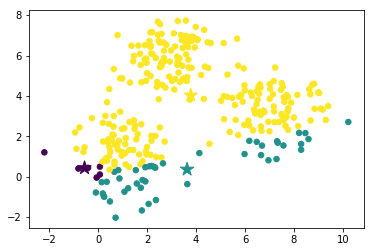

0.4844837452310223


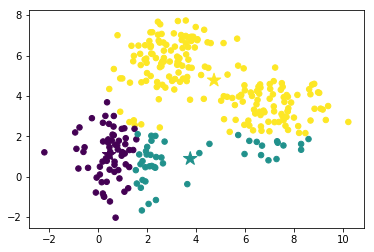

0.2774233737080954


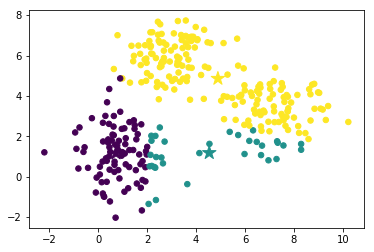

0.5064112799727086


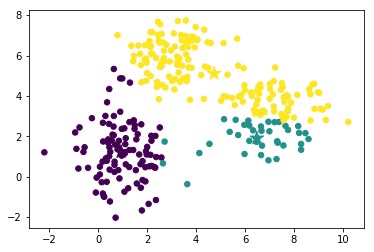

0.21495685015338598


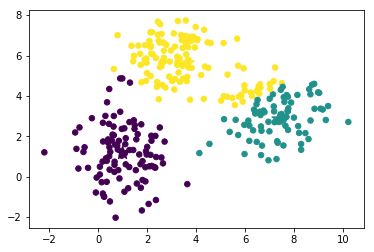

-0.04868363346795016


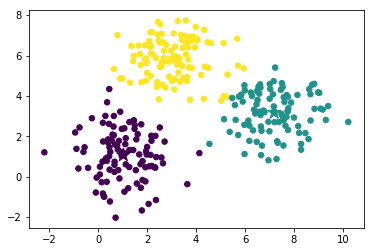

-0.020877154216504157


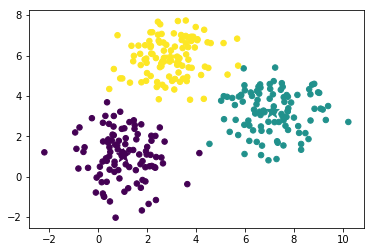

-0.002408129902038203


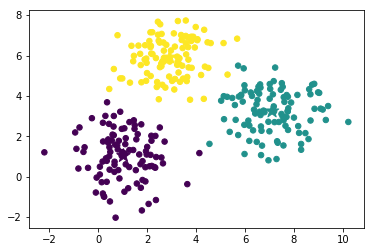

0.0


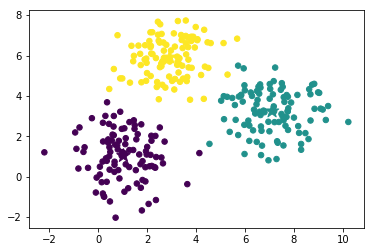

In [8]:
# 0. defining c_old as k x n array of zeros
c_old = np.zeros((k,n))
c_new = deepcopy(c)

# 0.2 calculating initial error
error = np.mean(np.mean(abs(c_new) - abs(c_old)))
print(error)

# 1. defining clusters as m x 2 matrix
# first column contains the cluster number (1, 2..k)
# the second column contains the distance between the point and the cluster center
cluster = np.zeros((m, 2))

# 2. defining distance matrix as m x k matrix
distance = np.zeros((m, k))

while(error != 0):
    for i in range(m):
        for j in range(k):
            # 3.calcualting distance of all points from the centroids of all k clusters
            distance[i,j] = findDist(x[i][:], c_new[j][:])
            
        # 4. find cluster to which point x[i] belongs
        clust = np.argmin(distance[i][:]) #cluster start from 0
        cluster[i][0] = clust
        cluster[i][1] = distance[i][clust]


    # 5. old cluster = new cluster
    c_old = deepcopy(c_new)

    # 6. calculating centroid of each cluster

    clustSum = np.zeros((k,n))
    clustNum = np.zeros((k,1))
    for i in range(m):
        clust = int(cluster[i][0])
        clustSum[clust, :] += x[i, :]
        clustNum[clust] += 1

    for i in range(k):
        c_new[i][:] = clustSum[i][:]/clustNum[i]

    error = np.mean(np.mean(abs(c_new) - abs(c_old)))
    print(error)
    plot(x, c_new, cluster)

In [9]:
# help(plt.scatter)